In [63]:
import torch
from matplotlib import pyplot as plt
from matplotlib import rc
import math
import xarray as xr

rc("font", **{"family": "Times"})
rc("text", usetex=True)
plt.rcParams['figure.dpi'] = 300

# version = "no_transform"
version = "sqrt"
# version = "transform_0.1"

test_cells = xr.load_dataset("test.nc").pr.values.flatten()
samples_cells = torch.load(f"samples_{version}.pt", map_location=torch.device('cpu')).numpy().flatten()

# samples_cells_no_transform = torch.load(f"samples_no_transform.pt", map_location=torch.device('cpu')).numpy().flatten()
samples_cells_sqrt = torch.load(f"samples_sqrt.pt", map_location=torch.device('cpu')).numpy().flatten()
samples_cells_transform = torch.load(f"samples_transform_0.1.pt", map_location=torch.device('cpu')).numpy().flatten()

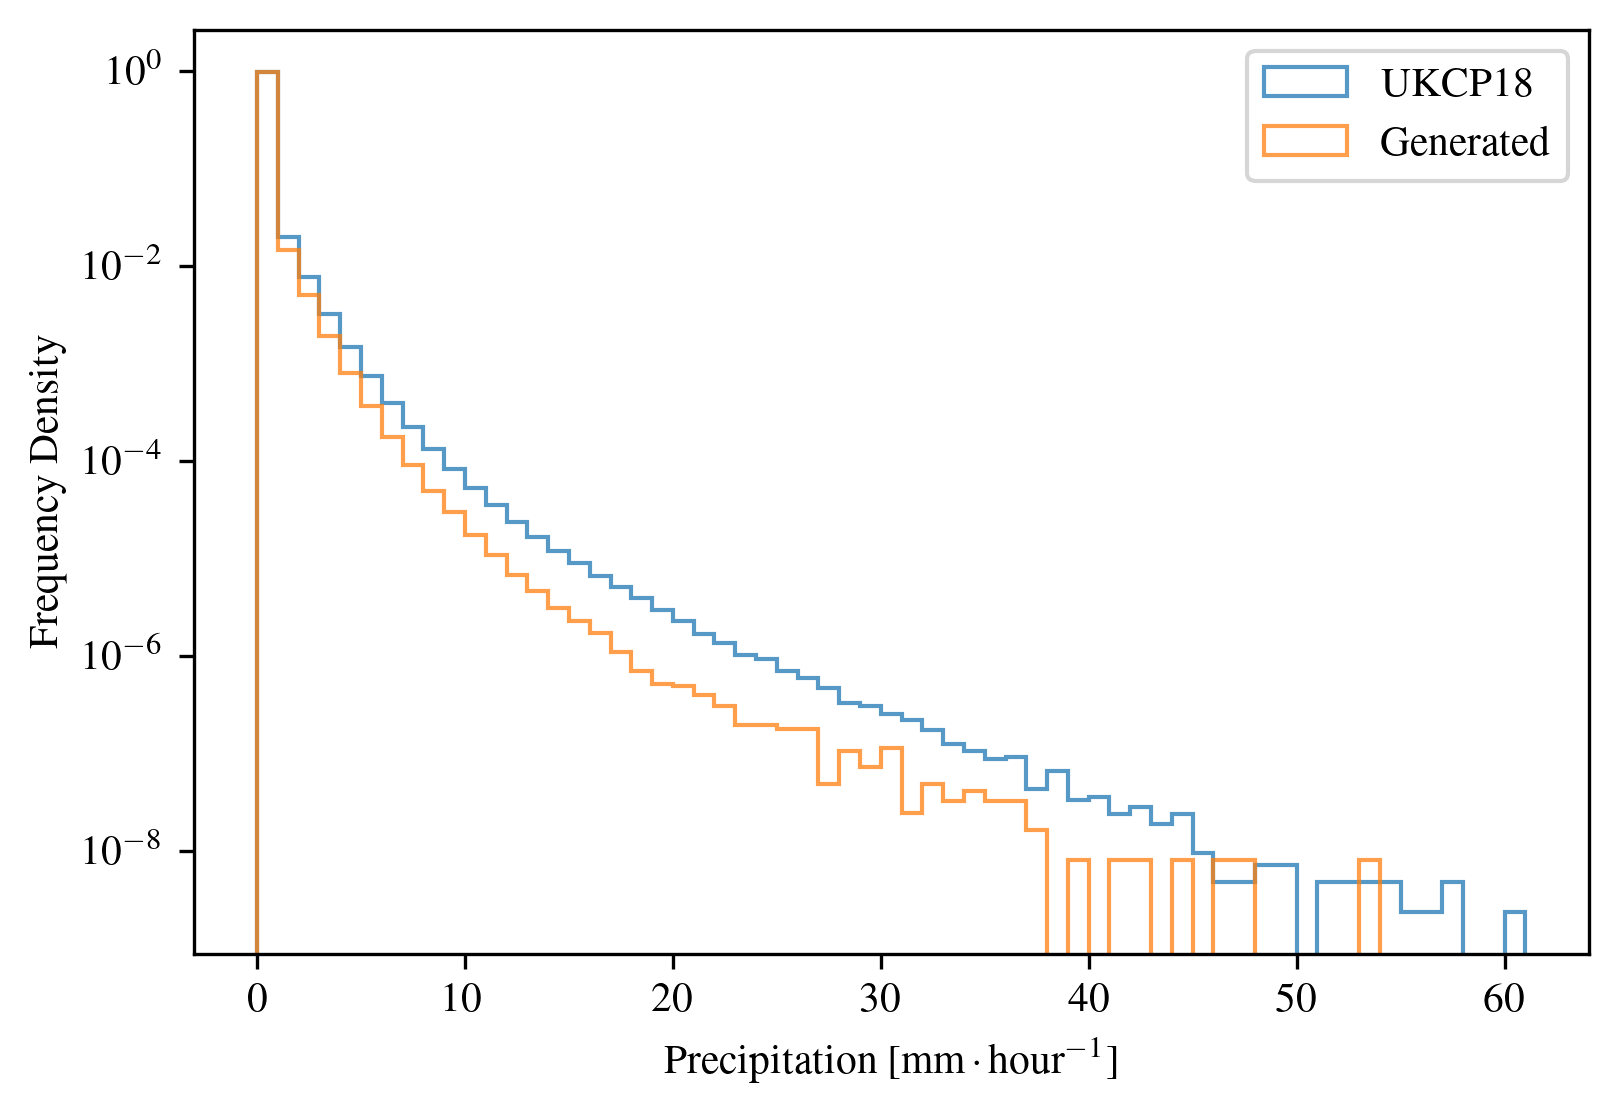

In [62]:
plt.figure(figsize=(6, 4))
max_value = max(test_cells.max(), samples_cells.max())
max_value_ceil = math.ceil(max_value)
plt.hist(test_cells, density = True, range = (0, max_value_ceil), bins = max_value_ceil, alpha = 0.75, histtype = "step", label = "UKCP18")
plt.hist(samples_cells, density = True, range = (0, max_value_ceil), bins = max_value_ceil, alpha = 0.75, histtype = "step", label = "Generated")
plt.yscale("log")
plt.xlabel('Precipitation [$\mathrm{mm}\cdot\mathrm{hour}^{-1}$]')
plt.ylabel('Frequency Density')
plt.legend()
plt.savefig("examples/histogram.png", bbox_inches = "tight", pad_inches = 0.02)
plt.show()

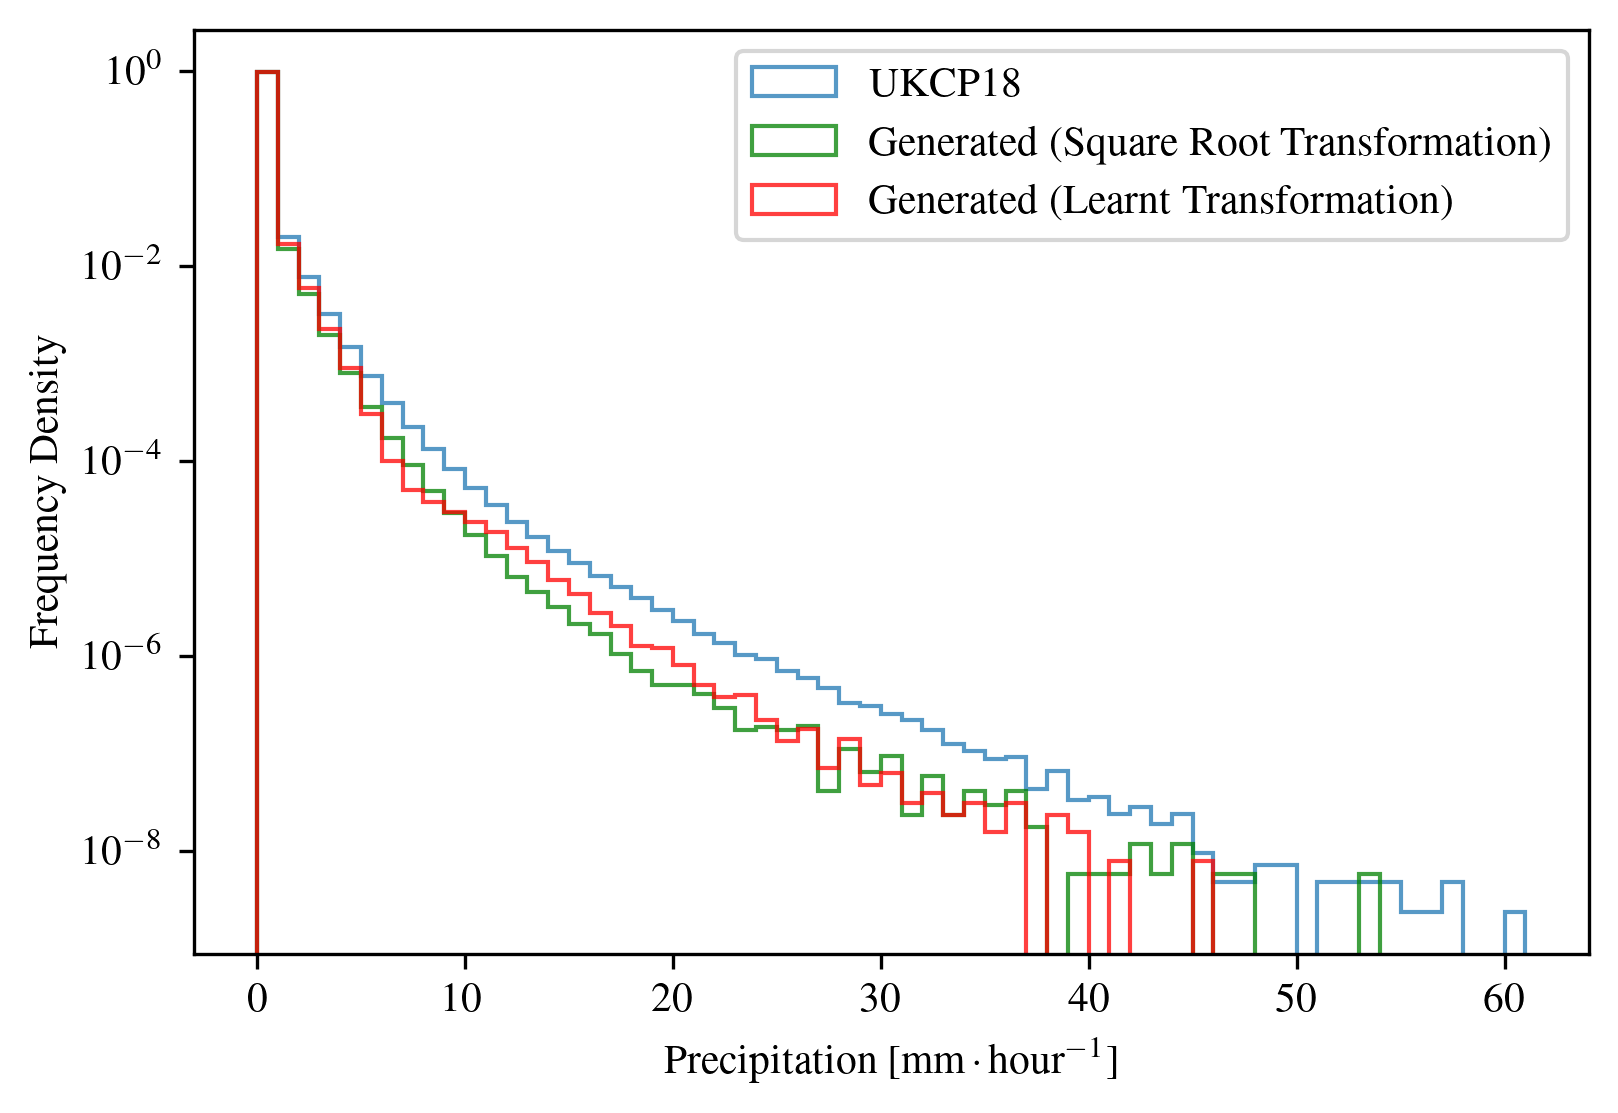

In [65]:
plt.figure(figsize=(6, 4))
max_value = max(test_cells.max(), samples_cells_sqrt.max(), samples_cells_transform.max())
max_value_ceil = math.ceil(max_value)
plt.hist(test_cells, density = True, range = (0, max_value_ceil), bins = max_value_ceil, alpha = 0.75, histtype = "step", label = "UKCP18")
plt.hist(samples_cells_sqrt, density = True, range = (0, max_value_ceil), bins = max_value_ceil, alpha = 0.75, histtype = "step", label = "Generated (Square Root Transformation)", color = "green")
plt.hist(samples_cells_transform, density = True, range = (0, max_value_ceil), bins = max_value_ceil, alpha = 0.75, histtype = "step", label = "Generated (Learnt Transformation)", color = "red")
plt.yscale("log")
plt.xlabel('Precipitation [$\mathrm{mm}\cdot\mathrm{hour}^{-1}$]')
plt.ylabel('Frequency Density')
plt.legend()
plt.savefig("examples/histogram.png", bbox_inches = "tight", pad_inches = 0.02)
plt.show()

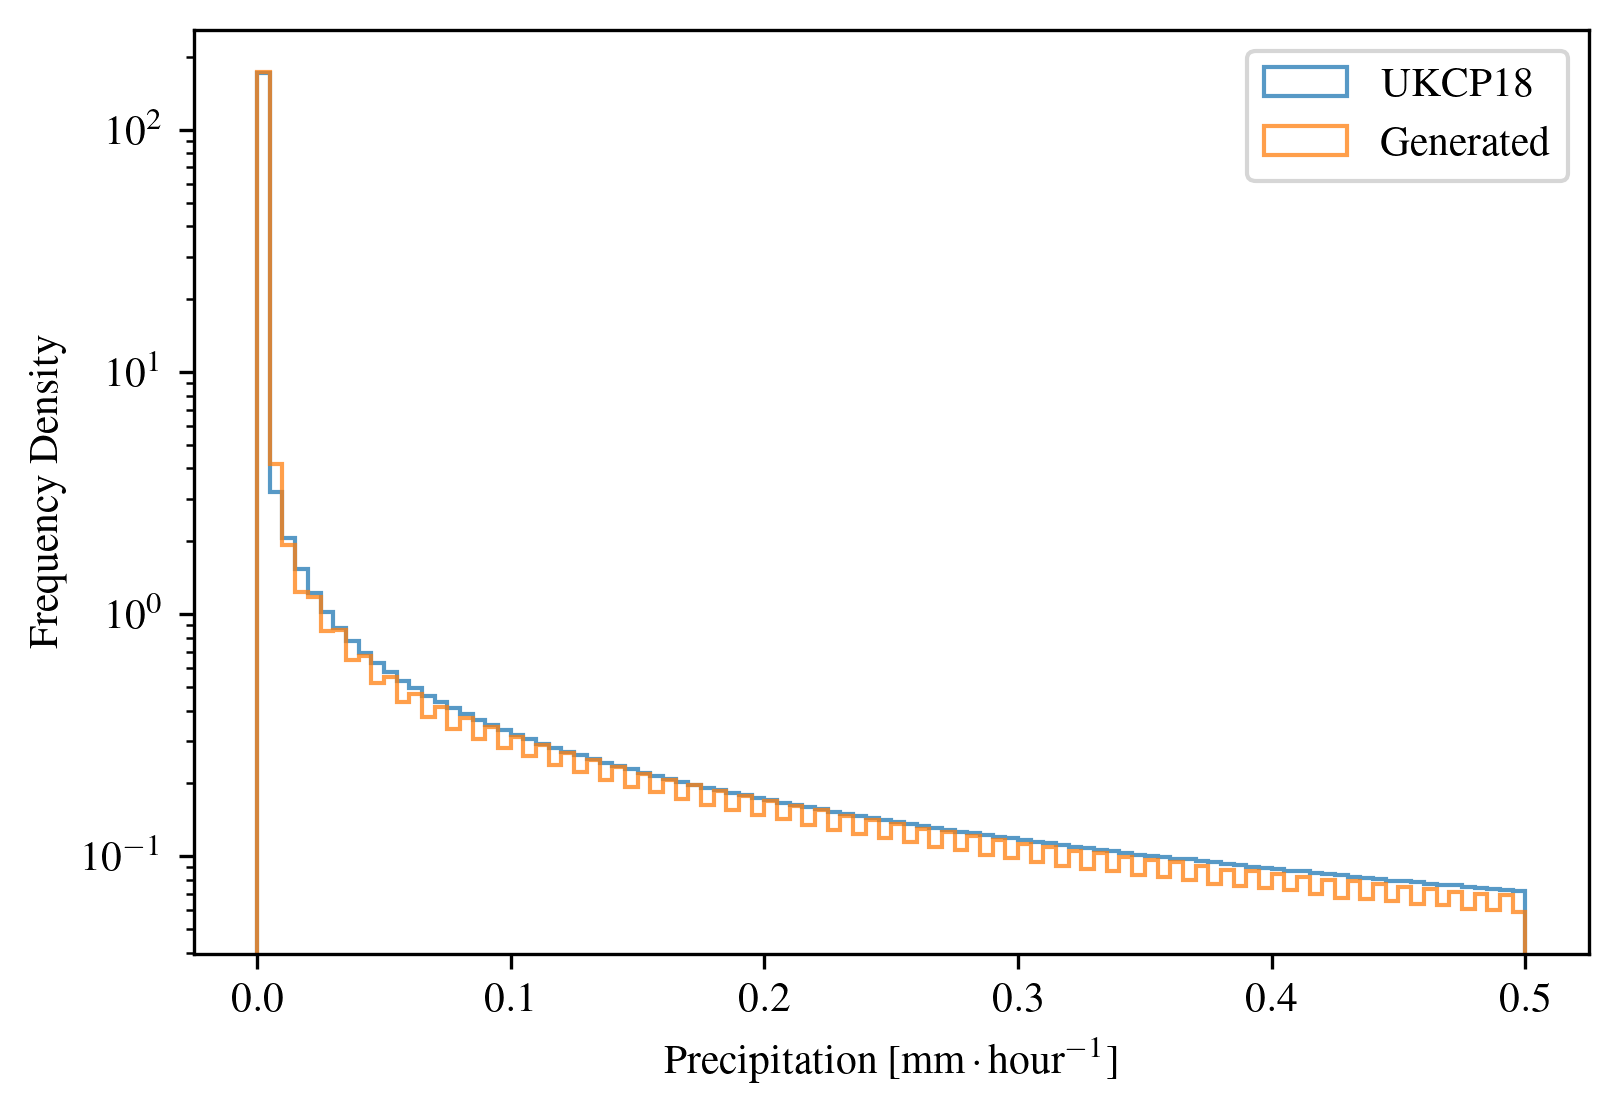

In [59]:
LIMIT = 0.5

test_cells_constrained = test_cells[test_cells <= LIMIT]
samples_cells_constrained = samples_cells[samples_cells <= LIMIT]

plt.figure(figsize=(6, 4))
plt.hist(test_cells_constrained, density = True, range = (0, LIMIT), bins = 100, alpha = 0.75, histtype = "step", label = "UKCP18")
plt.hist(samples_cells_constrained, density = True, range = (0, LIMIT), bins = 100, alpha = 0.75, histtype = "step", label = "Generated")
plt.yscale("log")
plt.xlabel('Precipitation [$\mathrm{mm}\cdot\mathrm{hour}^{-1}$]')
plt.ylabel('Frequency Density')
plt.legend()
plt.savefig("examples/histogram.png", bbox_inches = "tight", pad_inches = 0.02)
plt.show()

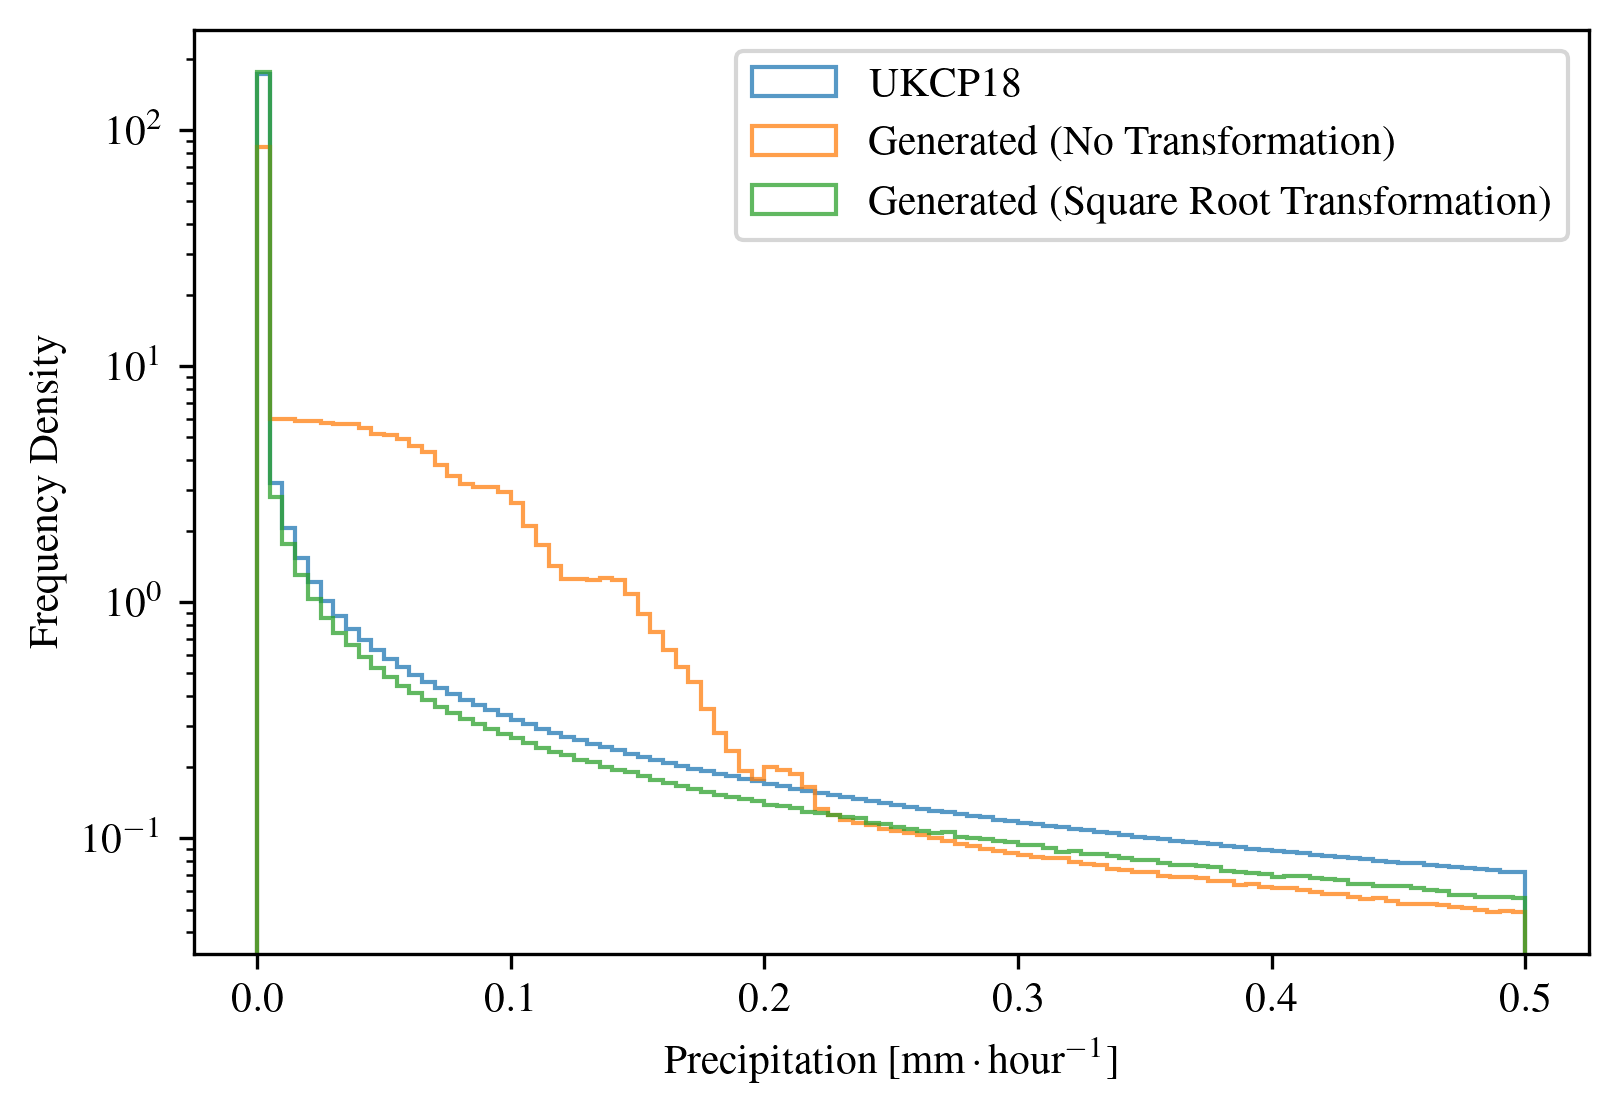

In [55]:
LIMIT = 0.5

test_cells_constrained = test_cells[test_cells <= LIMIT]
samples_cells_constrained_no_transform = samples_cells_no_transform[samples_cells_no_transform <= LIMIT]
samples_cells_constrained_sqrt = samples_cells_sqrt[samples_cells_sqrt <= LIMIT]

plt.figure(figsize=(6, 4))
plt.hist(test_cells_constrained, density = True, range = (0, LIMIT), bins = 100, alpha = 0.75, histtype = "step", label = "UKCP18")
plt.hist(samples_cells_constrained_no_transform, density = True, range = (0, LIMIT), bins = 100, alpha = 0.75, histtype = "step", label = "Generated (No Transformation)")
plt.hist(samples_cells_constrained_sqrt, density = True, range = (0, LIMIT), bins = 100, alpha = 0.75, histtype = "step", label = "Generated (Square Root Transformation)")
plt.yscale("log")
plt.xlabel('Precipitation [$\mathrm{mm}\cdot\mathrm{hour}^{-1}$]')
plt.ylabel('Frequency Density')
plt.legend()
plt.savefig("examples/histogram.png", bbox_inches = "tight", pad_inches = 0.02)
plt.show()